# **TTI109 - Estatística**
# **Aula 03 - Estatística Descritiva 02**

Nessa aula vamos aprender a construir:

* Histogramas de frequência relativa;
* Ogivas (gráficos de frequência acumulada);
* Gráficos setoriais (pizza);
* Gráficos de Pareto;
* Gráficos de dispersão;
* Séries temporais.

## **Conjunto de dados e distribuição de frequência**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis. A distribuição de frequência deve ter sete classes.

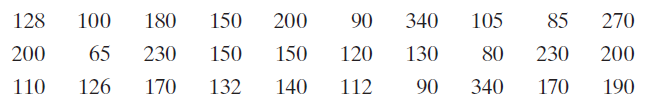

In [1]:
import pandas as pd
from math import ceil

# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])

# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7

# Distribuição de frequência
dist = data.value_counts(bins=7).sort_index()

# Reconfiguração do conjunto de dados: Series para DataFrame
dist_freq = pd.DataFrame(dist)
dist_freq = dist_freq.reset_index()
dist_freq.columns = ['Classe', 'Frequência']

# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)

# Atribuição dos intervalos para a coluna Classe
dist_freq['Classe'] = intervalos

# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]

# Inserção da coluna Pontos médios
dist_freq['Pontos médios'] = pts_medios

# Cálculo e inserção das colunas de frequência relativa e acumulada
observacoes = len(data)
dist_freq['Frequência relativa'] = dist_freq['Frequência']/observacoes
dist_freq['Frequência acumulada'] = dist_freq['Frequência'].cumsum()
display(dist_freq)

,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,"(65, 105]",6,85.0,0.200000,6
1,"(105, 145]",9,125.0,0.300000,15
2,"(145, 185]",6,165.0,0.200000,21
3,"(185, 225]",4,205.0,0.133333,25
4,"(225, 265]",2,245.0,0.066667,27
5,"(265, 305]",1,285.0,0.033333,28
6,"(305, 345]",2,325.0,0.066667,30


## **Construção do histograma de frequência relativa**

A estratégia de construção é a mesma daquela utilizada para o histograma de frequência (absoluta). O histograma é construído usando o método `hist` do `Pandas`. A novidade é o uso do parâmetro `weights`, para a construção do eixo vertical calibrado em frequências relativas.

Diversas características do histograma, tais como as classes (parâmetro `bins`), cor das barras e marcações nos eixos vertical e horizontal são programáveis. Também é inserida a frequência relativa observada no topo de cada barra.

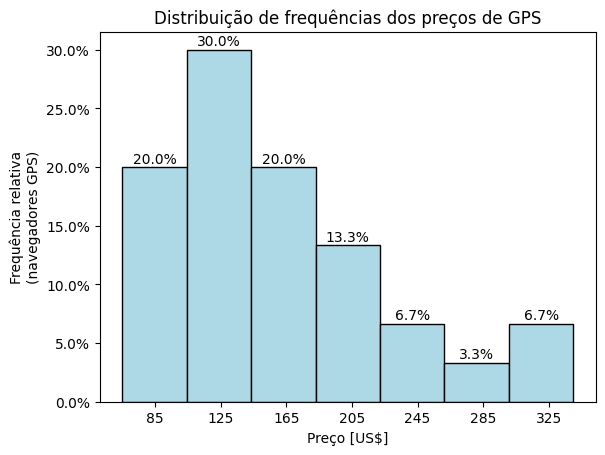

In [23]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

# Construção do histograma
histograma = data.hist(bins=n_classes, color='lightblue', edgecolor='black',
                       grid=False, weights=np.ones_like(data)/len(data))

# Inserção de atributos ao gráfico
histograma.set(xlabel='Preço [US$]',
               ylabel='Frequência relativa\n(navegadores GPS)',
               title='Distribuição de frequências dos preços de GPS',
               xticks=dist_freq['Pontos médios'])

# Inserção de rótulos nas barras do histograma
barras = histograma.patches
freqs = dist_freq['Frequência relativa']
ajuste_texto = 0.001
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    texto_freq = f'{freq*100:.1f}%'
    histograma.text(x=barra.get_x()+barra.get_width()/2, y=altura+ajuste_texto,
                    s=texto_freq, ha='center', va='bottom')

# Ajuste do eixo vertical para exibição das porcentagens
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## **Construção da ogiva (gráfico de frequência acumulada)**

Para construir o polígono de frequências, vamos empregar a biblioteca `matplotlib`.

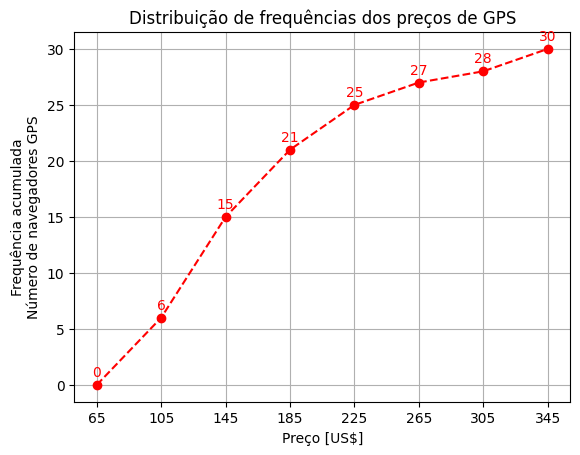

In [50]:
# Construção dos dados: vamos usar os extremos direitos de cada classe
x_data = [dist_freq['Classe'][0].left] + [extremos.right for extremos in dist_freq['Classe']]
y_data = [0] + list(dist_freq['Frequência acumulada'])

# Plotagem da ogiva, com diversos atributos
plt.plot(x_data, y_data,'ro--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência acumulada\nNúmero de navegadores GPS')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.grid()

# Registro das frequências acumuladas
for x, y in zip(x_data, y_data):
  plt.text(x=x, y=y+0.5, s=f'{y}', ha='center', va='bottom', color='red')
plt.show()

Vamos agora empregar as frequências relativas na construção da ogiva.

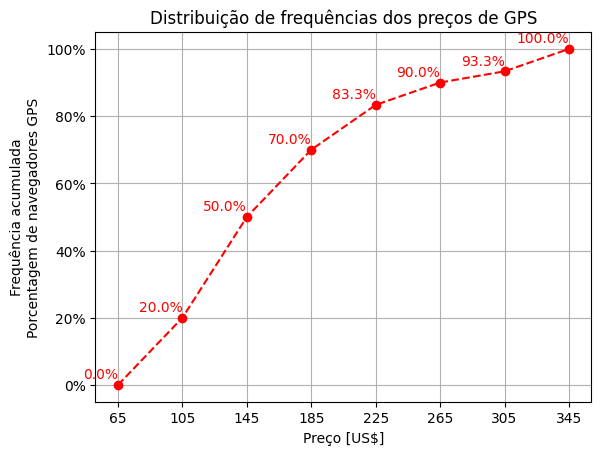

In [52]:
# Construção dos dados: vamos usar os extremos direitos de cada classe
x_data = [dist_freq['Classe'][0].left] + [extremos.right for extremos in dist_freq['Classe']]
y_data = np.array([0] + list(dist_freq['Frequência acumulada']))/observacoes

# Plotagem da ogiva, com diversos atributos
plt.plot(x_data, y_data,'ro--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência acumulada\nPorcentagem de navegadores GPS')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.grid()

# Registro das porcentagens acumuladas
for x, y in zip(x_data, y_data):
  plt.text(x=x, y=y+0.01, s=f'{y*100:.1f}%',
           ha='right', va='bottom', color='red')

# Ajuste do eixo vertical para exibição das porcentagens
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

## **Construindo um gráfico de pizza**
O gráfico setorial (circular), ou gráfico de pizza, é criado usando o método `pie` (torta) do `matplotlib`. O conjunto de dados é criado usando o `Pandas`, sendo os valores das colunas representados como uma lista de listas.

,Título,Frequência,Porcentagem
0,Tecnólogo,942,26.512806
1,Bacharelado,1716,48.297214
2,Mestrado,731,20.574163
3,Doutorado,164,4.615818


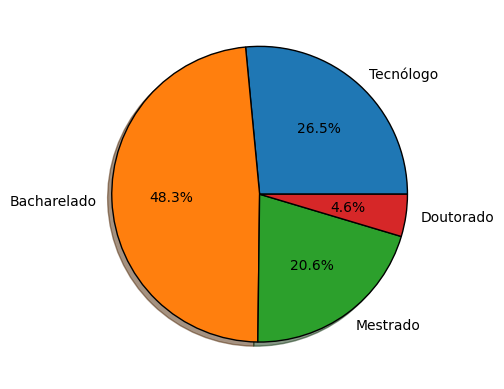

In [58]:
# Criação do conjunto de dados
dados = [['Tecnólogo', 942], ['Bacharelado', 1716],
         ['Mestrado', 731], ['Doutorado', 164]]
tabela = pd.DataFrame(dados, columns=['Título', 'Frequência'])
tabela['Porcentagem'] = tabela['Frequência']/tabela['Frequência'].sum()*100
display(tabela)

# Gráfico de pizza
pizza = plt.pie(x=tabela['Frequência'], labels=tabela['Título'],
                autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'},
                shadow=True)
plt.show()

## **Construindo um gráfico de Pareto**
Note que o conjunto de dados é criado novamente usando o `Pandas`, porém empregando um dicionário para representar a coluna de valores. Também será incluída a representação de porcentagem acumulada.

,Valores,PorcAcum
Roubo\nfuncionários,15.1,43.895349
Roubo\nlojas,12.3,79.651163
Erro\nAdm,4.2,91.860465
Fraude\nvendas,1.7,96.802326
Desconhecida,1.1,100.000000


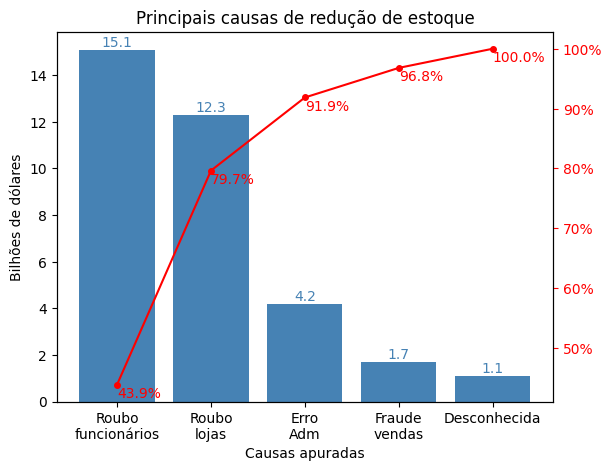

In [77]:
# Criação do conjunto de dados
dados = pd.DataFrame({'Valores': [4.2, 15.1, 12.3, 1.1, 1.7]})
dados.index = ['Erro\nAdm', 'Roubo\nfuncionários',
               'Roubo\nlojas', 'Desconhecida', 'Fraude\nvendas']

# Organizando os dados em ordem decrescente
dados = dados.sort_values(by='Valores', ascending=False)

# Criando a coluna da porcentagem acumulada
dados['PorcAcum'] = dados['Valores'].cumsum()/dados['Valores'].sum()*100
display(dados)

## Criação do gráfico de Pareto
# Definição das cores
cor_barra = 'steelblue'
cor_linha = 'red'
tam_linha = 4

# Construindo o gráfico básico (gráfico de barras)
fig, pareto = plt.subplots()
pareto.bar(x=dados.index, height=dados['Valores'], color=cor_barra)
pareto.set(xlabel='Causas apuradas',
           ylabel='Bilhões de dólares',
           title = 'Principais causas de redução de estoque')

# Inserção de rótulos nas barras do gráfico de Pareto
barras = pareto.patches
valores = dados['Valores']
for barra, valor in zip(barras, valores):
    altura = barra.get_height()
    pareto.text(x=barra.get_x()+barra.get_width()/2, y=altura,
                s=valor, ha='center', va='bottom', color=cor_barra)

# Adicionando linha de porcentagem acumulada (leitura no eixo secundário)
linha = pareto.twinx()
linha.plot(dados.index, dados['PorcAcum'], color=cor_linha,
           marker="o", ms=tam_linha)
linha.yaxis.set_major_formatter(PercentFormatter())
linha.tick_params(axis='y', colors=cor_linha)

# Registro das porcentagens acumuladas
for x, y in zip(dados.index, dados['PorcAcum']):
  plt.text(x=x, y=y-0.3, s=f'{y:.1f}%',
           ha='left', va='top', color=cor_linha)
plt.show()

## **Dados emparelhados - Diagrama de dispersão**
O conjunto de dados Íris de Fisher, elaborado pelo estatístico britânico Ronald Fisher, será utilizado como exemplo. Esse conjunto de dados descreve várias características físicas, tais como o comprimento e a largura das pétalas e sépalas (em centímetros).

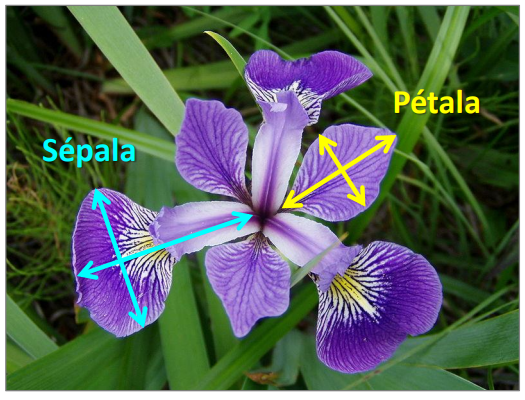

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


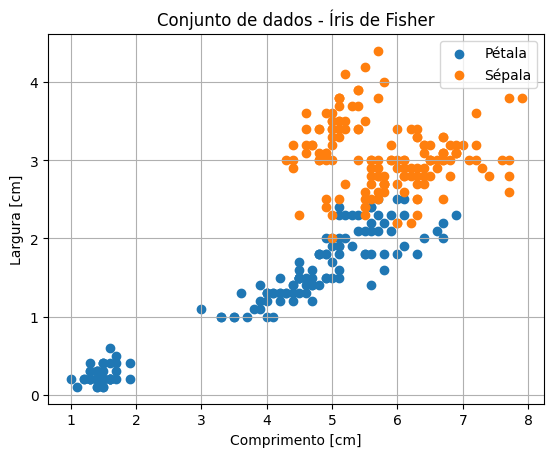

In [86]:
# Leitura dos dados "externos": módulo de datasets da biblioteca Scikit-learn
from sklearn.datasets import load_iris

# Obtém os dados em objeto da classe 'Bunch' e cria um DataFrame correspondente
Iris_dataset = load_iris()
iris = pd.DataFrame(data=Iris_dataset.data, columns=Iris_dataset.feature_names)
display(iris.head())

# Construção do diagrama de dispersão
plt.scatter(iris['petal length (cm)'], iris['petal width (cm)'])
plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'])
plt.xlabel('Comprimento [cm]')
plt.ylabel('Largura [cm]')
plt.title('Conjunto de dados - Íris de Fisher')
plt.legend(['Pétala', 'Sépala'])
plt.grid()
plt.show()

# **Dados emparelhados - Séries Temporais**
A tabela a seguir lista o número de assinantes de telefonia celular (em milhões) e o valor médio mensal da conta dos assinantes pelo serviço (em dólares) para os anos de 2002 a 2012 (Fonte: Cellular Telecommunications & Internet Association).

Vamos construir representações gráficas das séries temporais do número de assinantes e do ticket médio da assinatura do serviço de telefonia celular.

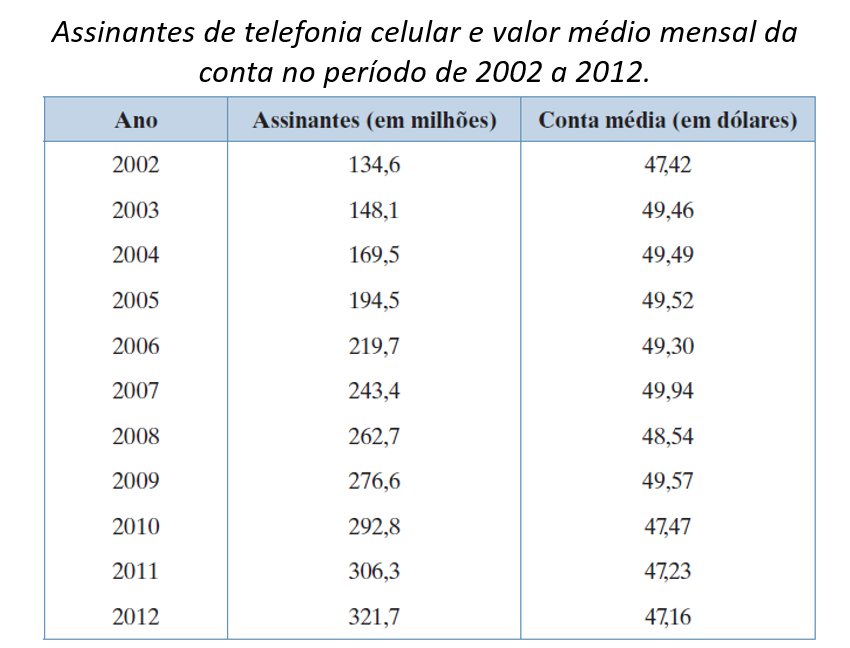


,Assinantes,Conta média
2002,134.6,47.42
2003,148.1,49.46
2004,169.5,49.49
2005,194.5,49.52
2006,219.7,49.30
2007,243.4,49.94
2008,262.7,48.54
2009,276.6,49.57
2010,292.8,47.47
2011,306.3,47.23


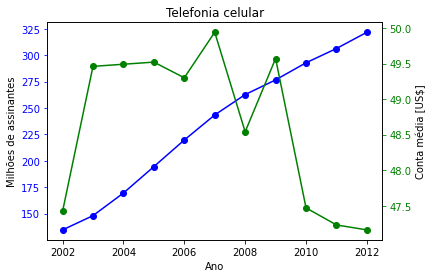

In [ ]:
# Criação do conjunto de dados usando dicionários
dados = pd.DataFrame({'Assinantes': [134.6, 148.1, 169.5, 194.5, 219.7, 243.4,
                                     262.7, 276.6, 292.8, 306.3, 321.7],
                      'Conta média':[47.42, 49.46, 49.49, 49.52, 49.30, 49.94,
                                     48.54, 49.57, 47.47, 47.23, 47.16]})
dados.index = list(range(2002, 2013))
display(dados)

# Séries temporais
fig, assinantes = plt.subplots()
assinantes.plot(dados.index, dados['Assinantes'], 'bo-')
assinantes.set(xlabel='Ano', ylabel='Milhões de assinantes',
               title = 'Telefonia celular')
assinantes.tick_params(axis='y', colors='blue')
conta = assinantes.twinx()
conta.plot(dados.index, dados['Conta média'], 'go-')
conta.set(ylabel='Conta média [US$]')
conta.tick_params(axis='y', colors='green')